Now we can access functions and variables to extract the type of data we need. You can view them and what they represent here => => =>https://aroussi.com/post/python-yahoo-finance.

In [3]:
!pip install yfinance

In [6]:
import yfinance as yf

In [124]:
# Download historical data for a stock
apple = yf.Ticker("AAPL")
apple_share_price_data = apple.history(period="max").reset_index()
# Display the downloaded data
apple_share_price_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1980-12-12 00:00:00-05:00,0.099058,0.099488,0.099058,0.099058,469033600,0.0,0.0
1,1980-12-15 00:00:00-05:00,0.094321,0.094321,0.093890,0.093890,175884800,0.0,0.0
2,1980-12-16 00:00:00-05:00,0.087429,0.087429,0.086999,0.086999,105728000,0.0,0.0
3,1980-12-17 00:00:00-05:00,0.089152,0.089582,0.089152,0.089152,86441600,0.0,0.0
4,1980-12-18 00:00:00-05:00,0.091737,0.092167,0.091737,0.091737,73449600,0.0,0.0


In [40]:
apple_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10963 entries, 1980-12-12 00:00:00-05:00 to 2024-06-07 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          10963 non-null  float64
 1   High          10963 non-null  float64
 2   Low           10963 non-null  float64
 3   Close         10963 non-null  float64
 4   Volume        10963 non-null  int64  
 5   Dividends     10963 non-null  float64
 6   Stock Splits  10963 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 685.2 KB


<Axes: xlabel='Date'>

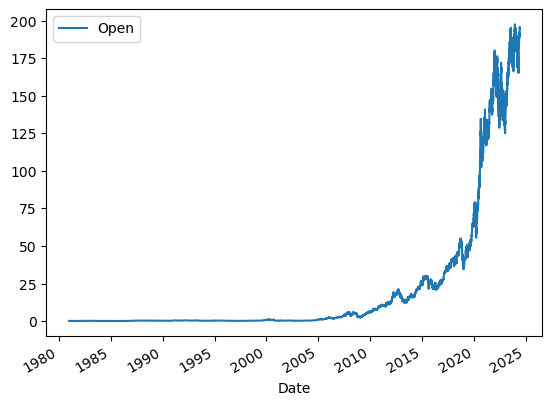

In [53]:
apple_share_price_data.plot(x="Date",y="Open")

In [56]:
apple.dividends

Date
1987-05-11 00:00:00-04:00    0.000536
1987-08-10 00:00:00-04:00    0.000536
1987-11-17 00:00:00-05:00    0.000714
1988-02-12 00:00:00-05:00    0.000714
1988-05-16 00:00:00-04:00    0.000714
                               ...   
2023-05-12 00:00:00-04:00    0.240000
2023-08-11 00:00:00-04:00    0.240000
2023-11-10 00:00:00-05:00    0.240000
2024-02-09 00:00:00-05:00    0.240000
2024-05-10 00:00:00-04:00    0.250000
Name: Dividends, Length: 83, dtype: float64

<Axes: xlabel='Date'>

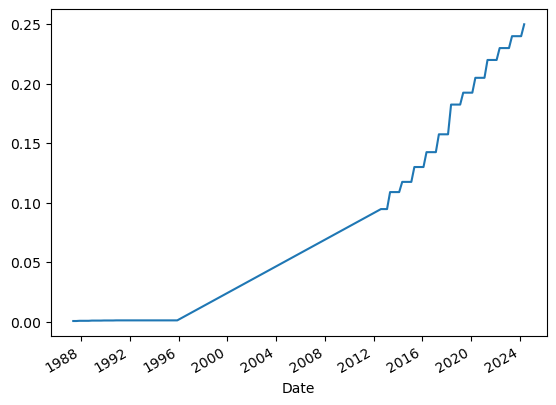

In [57]:
apple.dividends.plot()

In [116]:
amd = yf.Ticker("AMD")
amd_share_price_data = amd.history(period = "max").reset_index()
amd_share_price_data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1980-03-17 00:00:00-05:00,0.000000,3.302083,3.125000,3.145833,219600,0.0,0.0
1,1980-03-18 00:00:00-05:00,0.000000,3.125000,2.937500,3.031250,727200,0.0,0.0
2,1980-03-19 00:00:00-05:00,0.000000,3.083333,3.020833,3.041667,295200,0.0,0.0
3,1980-03-20 00:00:00-05:00,0.000000,3.062500,3.010417,3.010417,159600,0.0,0.0
4,1980-03-21 00:00:00-05:00,0.000000,3.020833,2.906250,2.916667,130800,0.0,0.0
...,...,...,...,...,...,...,...,...
11147,2024-06-04 00:00:00-04:00,162.839996,164.830002,158.869995,159.990005,48157200,0.0,0.0
11148,2024-06-05 00:00:00-04:00,162.070007,167.119995,161.380005,166.169998,60507500,0.0,0.0
11149,2024-06-06 00:00:00-04:00,165.460007,169.509995,163.860001,166.779999,47153700,0.0,0.0
11150,2024-06-07 00:00:00-04:00,166.589996,169.449997,165.860001,167.869995,44796000,0.0,0.0


In [60]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/amd.json"

In [66]:
import aiohttp
import os 
import json

In [88]:
async def download_file(url) : 
    async with aiohttp.ClientSession() as session :
        async with session.get(url) as response :
            response.raise_for_status()
            content = await response.read()
            path = os.path.join(os.getcwd() , os.path.basename(url))
            with open(path , "wb") as json_file:
                json_file.write(content)
    return os.path.abspath(path)

In [89]:
await download_file(url)

'C:\\Users\\walid\\Final Project Analyzing Stock Performance and Building a Dashboard\\amd.json'

In [92]:
with open ("amd.json" ,"r") as open_file:
    amd_infos = json.load(open_file)
amd_infos

{'zip': '95054',
 'sector': 'Technology',
 'fullTimeEmployees': 15500,
 'longBusinessSummary': 'Advanced Micro Devices, Inc. operates as a semiconductor company worldwide. The company operates in two segments, Computing and Graphics; and Enterprise, Embedded and Semi-Custom. Its products include x86 microprocessors as an accelerated processing unit, chipsets, discrete and integrated graphics processing units (GPUs), data center and professional GPUs, and development services; and server and embedded processors, and semi-custom System-on-Chip (SoC) products, development services, and technology for game consoles. The company provides processors for desktop and notebook personal computers under the AMD Ryzen, AMD Ryzen PRO, Ryzen Threadripper, Ryzen Threadripper PRO, AMD Athlon, AMD Athlon PRO, AMD FX, AMD A-Series, and AMD PRO A-Series processors brands; discrete GPUs for desktop and notebook PCs under the AMD Radeon graphics, AMD Embedded Radeon graphics brands; and professional graphi

In [104]:
amd_infos["country"]

'United States'

In [100]:
amd_infos["sector"]

'Technology'

In [130]:
first_day_volume = amd_share_price_data.iloc[0]["Volume"]
first_day_volume

219600